# Loading Libaries and Data

In [69]:
# PPT/PDF with your findings, backed by your model (Code upload optional)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
import xgboost as xgb

In [71]:
df_train = pd.read_csv("cs-training.csv")
df_test = pd.read_csv("cs-test.csv")

combine = [df_train, df_test]

df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


# Data Preprocessing, EDA and Transformation

In [72]:
df_train.describe()

# RevolvingUtilizationOfUnsecuredLines and DebtRatio should not be > 1

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [73]:
df_train.info()

# Nulls are found in MonthlyIncome, NumberOfDependents.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

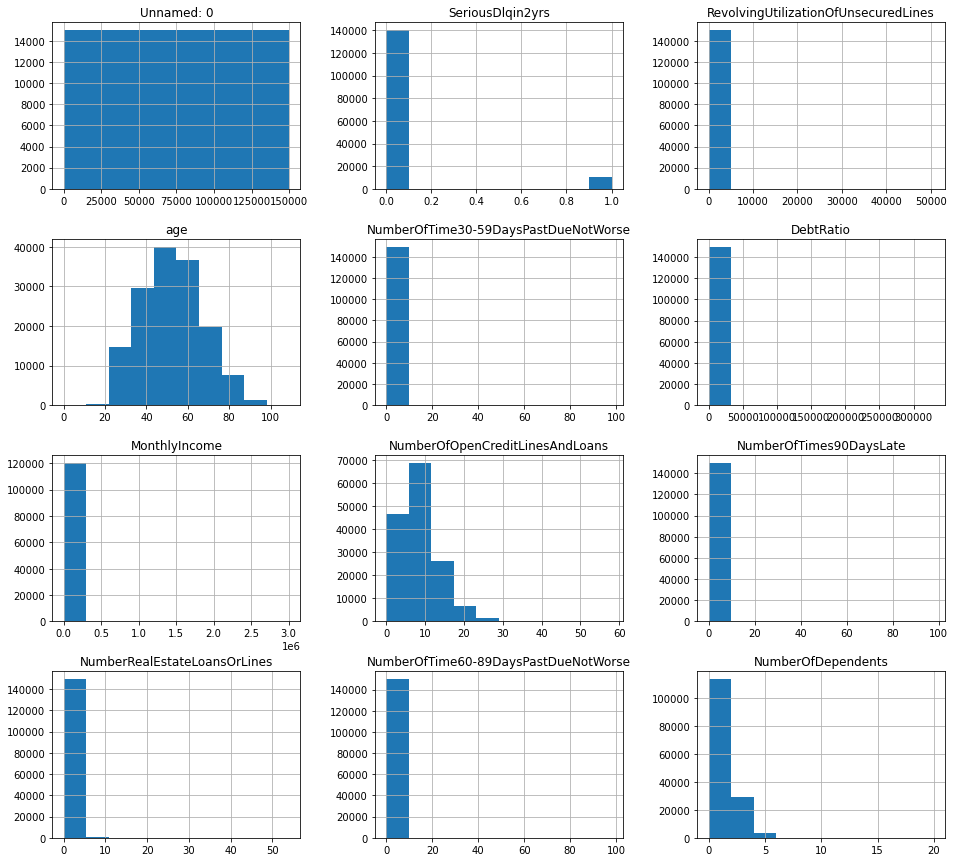

In [74]:
df_train.hist(figsize=(16,15))
plt.show()

# Here we can notice that there is uneven classes for delinquency. 
# Plus there are a lot of outliers for most data points

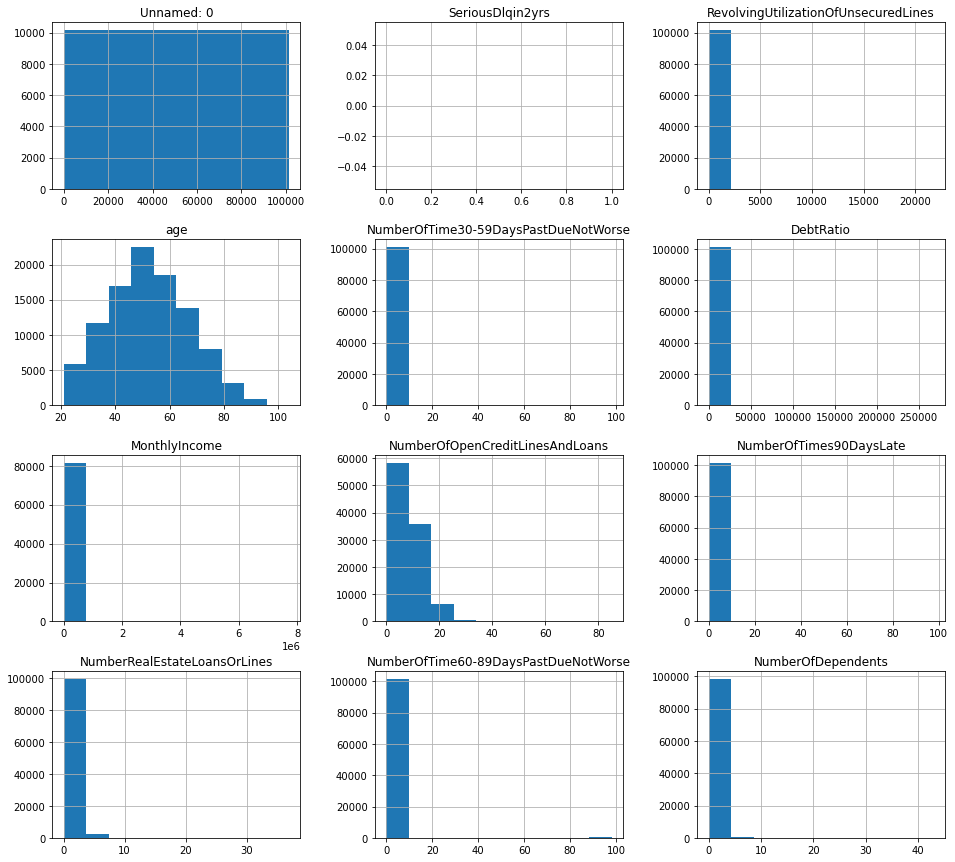

In [75]:
df_test.hist(figsize=(16,15))
plt.show()

# similar distributions

In [76]:
# for dataset in combine:
#     dataset.drop(["Unnamed: 0"], axis=1, inplace=True)
    
# df_train.head()

In [77]:
# df_train['AgeBand'] = pd.cut(df_train['age'], 8)
# df_train[['AgeBand', 'SeriousDlqin2yrs']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

for dataset in combine:    
    dataset['age'] = pd.cut(dataset['age'], 8, labels=np.arange(8))
    # Replacing null MonthlyIncome with average income for each age group. Didn't work
    # for i in range(8):
    #     dataset['MonthlyIncome'].fillna(dataset['MonthlyIncome'].loc[dataset['age'] == i].dropna().median(), inplace=True)

    # dataset.loc[dataset['age'] <= 13.6, 'age'] = 0
    # dataset.loc[(dataset['age'] > 13.6) & (dataset['age'] <= 27.25), 'age'] = 1
    # dataset.loc[(dataset['age'] > 27.25) & (dataset['age'] <= 40.88), 'age'] = 2
    # dataset.loc[(dataset['age'] > 40.88) & (dataset['age'] <= 54.5), 'age'] = 3
    # dataset.loc[(dataset['age'] > 54.5) & (dataset['age'] <= 68.13), 'age'] = 4
    # dataset.loc[(dataset['age'] > 68.13) & (dataset['age'] <= 81.75), 'age'] = 5
    # dataset.loc[(dataset['age'] > 81.75) & (dataset['age'] <= 95.3), 'age'] = 6
    # dataset.loc[ dataset['age'] > 95.3, 'age']=7

df_train[['age', 'SeriousDlqin2yrs']].groupby(['age'], as_index=False).mean().sort_values(by='age', ascending=True)


,age,SeriousDlqin2yrs
0,0,0.000000
1,1,0.117128
2,2,0.100989
3,3,0.079847
4,4,0.044400
5,5,0.022900
6,6,0.021469
7,7,0.047619


In [78]:
for dataset in combine:    
    dataset = dataset[dataset['DebtRatio']<=1]
    dataset = dataset[dataset['RevolvingUtilizationOfUnsecuredLines']<=1]

In [79]:
# These four lines of codes below show the kind of variability in NumberOfOpenCreditLinesAndLoans. CHECK FOR OTHER VARIABLES

# df_train['NumberOfOpenCreditLinesAndLoans'] = pd.cut(df_train['NumberOfOpenCreditLinesAndLoans'], 8)
# df_train[['NumberOfOpenCreditLinesAndLoans_bin', 'SeriousDlqin2yrs']].groupby(['NumberOfOpenCreditLinesAndLoans_bin'], as_index=False).mean().sort_values(by='NumberOfOpenCreditLinesAndLoans_bin', ascending=True)
# Mostly same dlq risk except for 7 and 8, creating binary class.

# Is creating diff variable better? NO. Is it better without the binary class? NO.

for dataset in combine:    
    # dataset['NumberOfOpenCreditLinesAndLoans'] = pd.cut(dataset['NumberOfOpenCreditLinesAndLoans'], 8, labels=np.arange(8))
    dataset.loc[dataset['NumberOfOpenCreditLinesAndLoans'] <= 43.5, 'NumberOfOpenCreditLinesAndLoans'] = 0
    dataset.loc[dataset['NumberOfOpenCreditLinesAndLoans'] > 43.5, 'NumberOfOpenCreditLinesAndLoans'] = 1

df_train[['NumberOfOpenCreditLinesAndLoans', 'SeriousDlqin2yrs']].groupby(['NumberOfOpenCreditLinesAndLoans'], as_index=False).mean()

,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
0,0,0.066819
1,1,0.142857


In [80]:
# guess_income = np.zeros((8,12),dtype=int) 

# for idx, dataset in enumerate(combine): 
#     print('Guess values of income based on age and NumberOfDependents of the customer...')
#     for i in range(0, 8):
#         for j in [0,1,2,3,4,5,6,7,8,9,10,13,20]:
#             guess_df = dataset[(dataset['age'] == i) & (dataset['NumberOfDependents'] == j)]['MonthlyIncome'].dropna()
#             income_guess = guess_df.median()
#             guess_income[i,j] = float(income_guess)
#     print('Guess_Age table:\n',guess_income)
#     print ('\nAssigning age values to NAN age values in the dataset...')
#     for i in range(0, 8):
#         for j in [0,1,2,3,4,5,6,7,8,9,10,13,20]:
#             dataset.loc[(dataset.MonthlyIncome.isnull()) & (dataset.age == i) & (dataset.NumberOfDependents == j),'MonthlyIncome'] = guess_income[i,j]
#     dataset['MonthlyIncome'] = dataset['MonthlyIncome'].astype(int)
#     print()
# print('Done! \n\n\n')
# df_train.head()

In [81]:
# Replacing Nulls.

for dataset in combine:
    dataset['MonthlyIncome'].fillna(dataset['MonthlyIncome'].dropna().median(), inplace=True)
    dataset['NumberOfDependents'].fillna(dataset['NumberOfDependents'].dropna().median(), inplace=True)
    dataset['MonthlyIncome']=pd.qcut(dataset['MonthlyIncome'], 4, labels=np.arange(4))
    dataset['MonthlyIncome'] = dataset['MonthlyIncome'].astype(int)

In [82]:
df_train[['MonthlyIncome', 'SeriousDlqin2yrs']].groupby(['MonthlyIncome']).mean()

,SeriousDlqin2yrs
MonthlyIncome,
0,0.090526
1,0.065185
2,0.063602
3,0.047336


In [83]:
df_train[['NumberOfDependents', 'SeriousDlqin2yrs']].groupby(['NumberOfDependents']).agg(['count','mean'])
# We can perhaps create manual buckets


SeriousDlqin2yrs          
                              count      mean
NumberOfDependents                           
0.0                           90826  0.058067
1.0                           26316  0.073529
2.0                           19522  0.081139
3.0                            9483  0.088263
4.0                            2862  0.103774
5.0                             746  0.091153
6.0                             158  0.151899
7.0                              51  0.098039
8.0                              24  0.083333
9.0                               5  0.000000
10.0                              5  0.000000
13.0                              1  0.000000
20.0                              1  0.000000

In [84]:
# Does not help

# for dataset in combine:
#     dataset.loc[(dataset['NumberOfDependents'] >=4), 'NumberOfDependents'] = 4
#     # dataset.loc[(dataset['NumberOfDependents'] >=7) & (dataset['NumberOfDependents'] <9), 'NumberOfDependents'] = 8
#     # dataset.loc[(dataset['NumberOfDependents'] >=9), 'NumberOfDependents'] = 10

In [85]:
# Bucketing the numerical value of the variables on the basis of dlq rate to capture their effect better

# NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse DONE, not helpful
# RevolvingUtilizationOfUnsecuredLines, DebtRatio

# df_train[['NumberRealEstateLoansOrLines', 'SeriousDlqin2yrs']].groupby(['NumberRealEstateLoansOrLines']).agg(['count','mean']) 

In [86]:
# for dataset in combine:
    
#     dataset.RevolvingUtilizationOfUnsecuredLines = dataset.RevolvingUtilizationOfUnsecuredLines.round(1)
#     dataset.DebtRatio = dataset.DebtRatio.round(1)

#     dataset.loc[(dataset['NumberRealEstateLoansOrLines'] <=4), 'NumberRealEstateLoansOrLines'] = 0
#     dataset.loc[(dataset['NumberRealEstateLoansOrLines'] >4), 'NumberRealEstateLoansOrLines'] = 1

#     dataset.loc[(dataset['NumberOfTime30-59DaysPastDueNotWorse'] <1), 'NumberOfTime30-59DaysPastDueNotWorse'] = 0
#     dataset.loc[(dataset['NumberOfTime30-59DaysPastDueNotWorse'] >=1), 'NumberOfTime30-59DaysPastDueNotWorse'] = 1

#     dataset.loc[(dataset['NumberOfTimes90DaysLate'] <1), 'NumberOfTimes90DaysLate'] = 0
#     dataset.loc[(dataset['NumberOfTimes90DaysLate'] >=1), 'NumberOfTimes90DaysLate'] = 1

#     dataset.loc[(dataset['NumberOfTime60-89DaysPastDueNotWorse'] <1), 'NumberOfTime60-89DaysPastDueNotWorse'] = 0
#     dataset.loc[(dataset['NumberOfTime60-89DaysPastDueNotWorse'] >=1), 'NumberOfTime60-89DaysPastDueNotWorse'] = 1

# df_train.head()

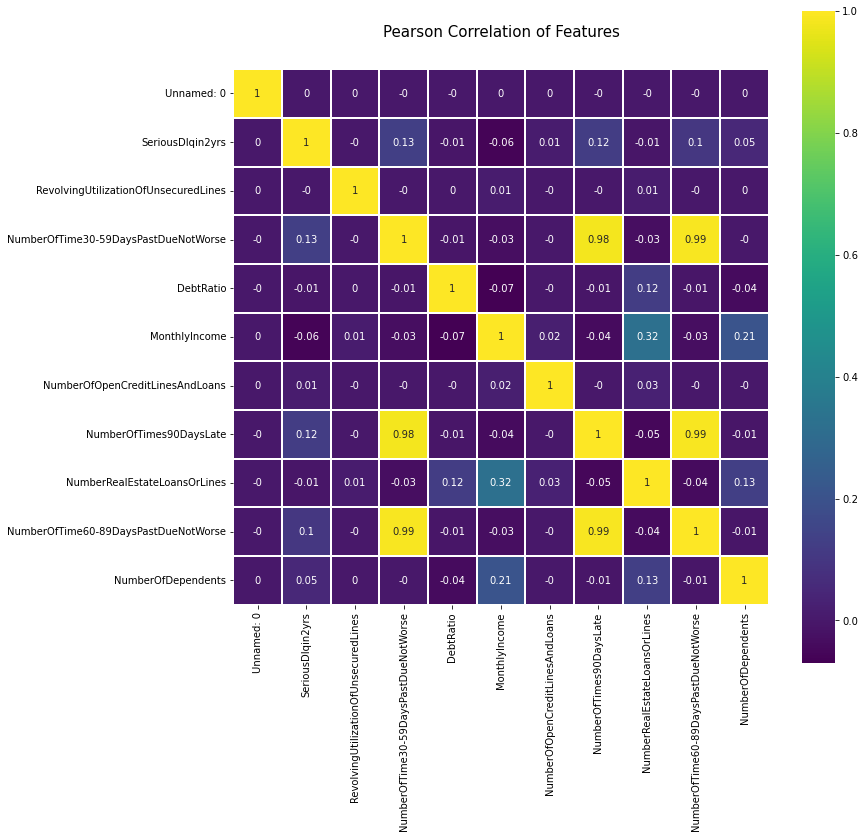

In [87]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

# Modelling

In [88]:
X = df_train.drop(["Unnamed: 0","SeriousDlqin2yrs"], axis=1)
Y = df_train["SeriousDlqin2yrs"]

X_submission  = df_test.drop(["Unnamed: 0","SeriousDlqin2yrs"], axis=1).copy()

print(X.shape, Y.shape)

(150000, 10) (150000,)


In [89]:
np.random.seed(29)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
# Important to stratify because uneven classes

In [90]:
# model = LinearRegression(n_jobs = -1)
# model.fit(X_train, Y_train)
# score = model.score(X_test, Y_test)
# print(score)

In [91]:
# model = KNeighborsRegressor(n_neighbors=10)
# model.fit(X_train, Y_train)
# score = model.score(X_test, Y_test)
# print(score)

In [92]:
# model = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(20,10,4), max_iter=1000, tol=0.00001, activation='logistic', random_state = 29)
# model.fit(X_train, Y_train)
# score = model.score(X_test, Y_test)
# print(score)

In [93]:
# model = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(5,3), max_iter=1000, tol=0.00001, activation='logistic', random_state = 29)
# model.fit(X_train, Y_train)
# score = model.score(X_test, Y_test)
# print(score)

In [94]:
# HYPERPARAMETER TUNING
# 0.20236049438596904 (15,10,4), (15,20,4)

# Bagging
# for value in [3000,4000,5000,6000,7000]: n_estimators
# for value in [1500,2000,2500,3000]: max_samples

# MLP
# for value in ['identity', 'logistic', 'tanh', 'relu']: activation
# for value in ['lbfgs', 'sgd', 'adam']: solver
# for value in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]: alpha/tol
# for value in [200,500,1000,2000,5000,10000]: max_iter

# for value in [(15,20,1)]:          
#     # model = BaggingRegressor(DecisionTreeRegressor(random_state=29), n_estimators=5000, max_samples=2500, bootstrap=True, n_jobs=-1)
#     model = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,20,4), max_iter=1000, tol=1e-05, activation='logistic', random_state = 29)
#     model.fit(X_train, Y_train)
#     score = model.score(X_test, Y_test)
#     print(value, score)

In [95]:
# model = BaggingRegressor(DecisionTreeRegressor(random_state=29), n_estimators=5000, max_samples=2500, bootstrap=True, n_jobs=-1)
# model.fit(X_train, Y_train)
# score = model.score(X_test, Y_test)
# print(score)

In [96]:
# model = BaggingRegressor(DecisionTreeRegressor(random_state=29), n_estimators=5000, max_samples=500, bootstrap=True, n_jobs=-1)
# model.fit(X_train, Y_train)
# score = model.score(X_test, Y_test)
# print(score)

In [104]:
# Check individual models to assign weights; perform hyperparam tuning

esti = []
esti.append(('KNN', KNeighborsRegressor(n_neighbors=10)))
esti.append(('MLP', MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,20,4), max_iter=1000, tol=1e-05, activation='logistic', random_state = 29)))
esti.append(('MLP2', MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(5,3), max_iter=1000, tol=0.00001, activation='logistic', random_state = 29)))
esti.append(('RF', BaggingRegressor(DecisionTreeRegressor(random_state=29), n_estimators=5000, max_samples=2500, bootstrap=True, n_jobs=-1)))
esti.append(('RF2', BaggingRegressor(DecisionTreeRegressor(random_state=29), n_estimators=5000, max_samples=500, bootstrap=True, n_jobs=-1)))
esti.append(('LinR', LinearRegression(n_jobs = -1)))
esti.append(('GB', GradientBoostingRegressor(n_estimators = 500, tol = 0.0001)))

model = VotingRegressor(estimators = esti, n_jobs = -1, weights=[2,9,5,9,8,1,10])

cv = KFold(n_splits=5, random_state=29, shuffle=True)
for train, test in cv.split(X_train):
    x_train, x_test = X_train.iloc[train], X_train.iloc[test]
    y_train, y_test = Y_train.iloc[train].tolist(), Y_train.iloc[test].tolist()
    model.fit(x_train, y_train)
    print(model.score(x_test, y_test))

0.20172738024455628
0.2102643066343005
0.2061334891615273
0.21041000112649266
0.22631722431797285


In [98]:
# model = RandomForestRegressor(n_estimators=500)
# model.fit(X_train, Y_train)
# score = model.score(X_test, Y_test)
# print(score)

Training accuracy Random Forest: 0.22568810556180363


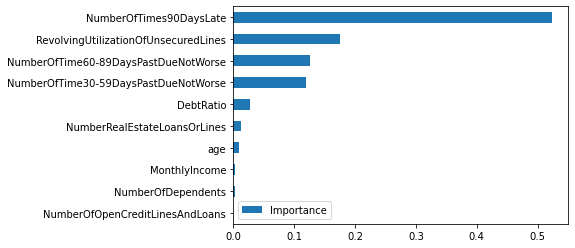

In [102]:
# def plot_model_var_imp( model , X , y ):
#     imp = pd.DataFrame( 
#         model.feature_importances_  , 
#         columns = [ 'Importance' ] , 
#         index = X.columns 
#     )
#     imp = imp.sort_values( [ 'Importance' ] , ascending = True )
#     imp[ : 10 ].plot( kind = 'barh' )
#     print ('Training accuracy Random Forest:',model.score( X , y ))

# plot_model_var_imp(model, X_train, Y_train)

In [100]:
# model = GradientBoostingRegressor()
# model.fit(X_train, Y_train)
# score = model.score(X_test, Y_test)
# print(score)

0.20833315496068439


# Submission

In [105]:
Y_submission = model.predict(X_submission)
submission = pd.DataFrame({ "Id": df_test["Unnamed: 0"], "Probability": Y_submission})
submission.loc[submission['Probability'] <0, 'Probability'] = 0.0
submission.loc[submission['Probability'] >1, 'Probability'] = 1.0
submission.to_csv('submission_GB.csv', index=False)
